# Завдання 1
Побудувати звичайну багатошарову нейронну мережу для датасету fashion
mnist

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

1. Завантажити датасет

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Роздрукувати 10 зображень

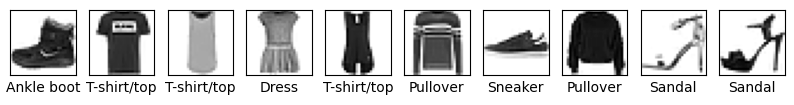

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

3. Підготовка даних (нормалізація)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

4. Побудова архітектури моделі

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(300, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Виведення архітектури моделі
model.summary()

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 300)                 │         153,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 598,886 (2.28 MB)

 Trainable params: 597,262 (2.28 MB)

 Non-trainable params: 1,624 (6.34 KB)

5. Використання ранньої зупинки та зменшення швидкості навчання

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

6. Навчання моделі

In [ ]:
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7439 - loss: 0.7329 - val_accuracy: 0.8139 - val_loss: 0.4779 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.8208 - loss: 0.4913 - val_accuracy: 0.8362 - val_loss: 0.4526 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.8297 - loss: 0.4662 - val_accuracy: 0.8386 - val_loss: 0.4388 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8423 - loss: 0.4339 - val_accuracy: 0.8526 - val_loss: 0.4062 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.8477 - loss: 0.4180 - val_accuracy: 0.8495 - val_loss: 0.4031 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8539 - loss: 0.4036 - val_accuracy: 0.8617 - val_loss: 0.3766 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accura

7. Збереження моделі на Google Диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

Mounted at /content/drive


8. Побудова графіків функції втрат і точності

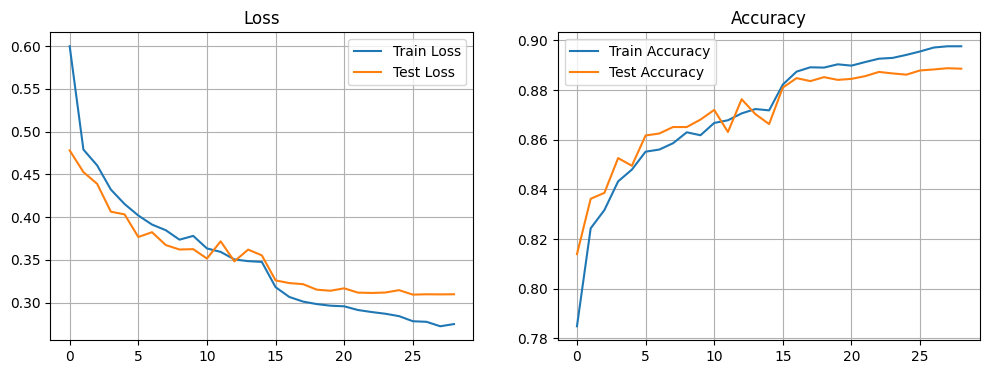

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

9. Виведення класифікаційного звіту

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Перетворюємо прогнози в мітки
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 - 1s - 4ms/step - accuracy: 0.8879 - loss: 0.3092
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.80      0.81      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.79      0.81      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.70      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Результати розпізнавання із прогнозованим і справжнім класом

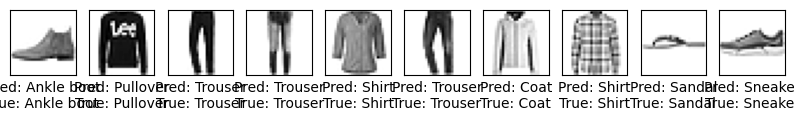

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()

# Завдання 2

In [ ]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

Завантаження датасету Fashion MNIST

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Нормалізація даних

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Візуалізація кількох зображень із тренувального набору

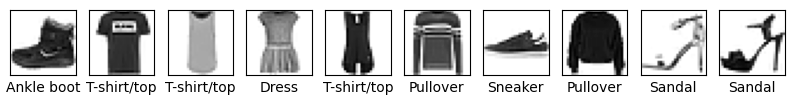

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Функція для побудови моделі з налаштуванням параметрів

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=256, max_value=512, step=64), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Налаштування RandomSearch для пошуку найкращих гіперпараметрів

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Запуск пошуку гіперпараметрів

In [ ]:
tuner.search(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels),
             callbacks=[early_stopping, reduce_lr])

Trial 10 Complete [00h 12m 41s]
val_accuracy: 0.8998000025749207

Best val_accuracy So Far: 0.901199996471405
Total elapsed time: 02h 36m 49s


Отримання та навчання найкращої моделі

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

history = best_model.fit(train_images, train_labels, epochs=50,
                         validation_data=(test_images, test_labels),
                         callbacks=[early_stopping, reduce_lr])

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,370 (1.04 MB)

 Trainable params: 270,346 (1.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9175 - loss: 0.2204 - val_accuracy: 0.8921 - val_loss: 0.3136 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9167 - loss: 0.2222 - val_accuracy: 0.8934 - val_loss: 0.2987 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9150 - loss: 0.2266 - val_accuracy: 0.8938 - val_loss: 0.3003 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9166 - loss: 0.2197 - val_accuracy: 0.8960 - val_loss: 0.3008 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9163 - loss: 0.2230 - val_accuracy: 0.8967 - val_loss: 0.2961 - learning_rate: 1.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9160 - loss: 0.2245 - val_accuracy: 0.8927 - val_loss: 0.3048 - learning_rate: 1.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 

Оцінка моделі на тестових даних

In [ ]:
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8979 - loss: 0.2951
Test Accuracy: 0.8985999822616577
Test Loss: 0.29092374444007874


Побудова графіків функції втрат і точності

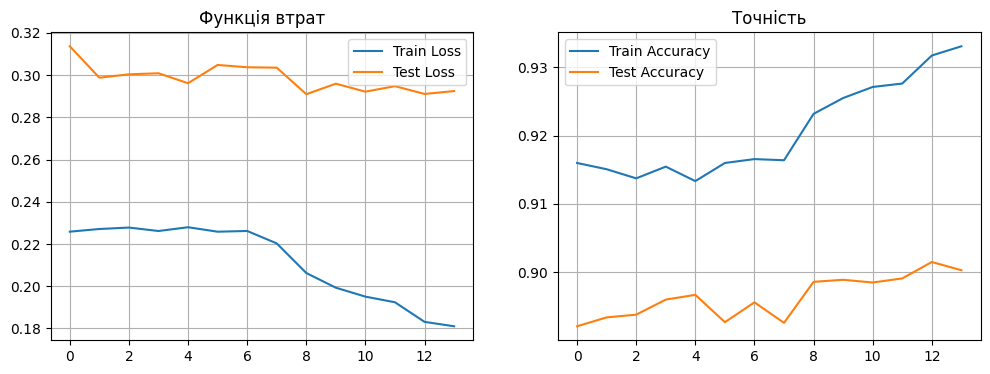

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Функція втрат')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Точність')
plt.grid(True)
plt.legend()

plt.show()

Класифікаційний звіт

In [ ]:
y_pred = best_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(test_labels, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.84      0.82      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.83      0.84      0.83      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.72      0.71      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Візуалізація кількох зображень із прогнозами

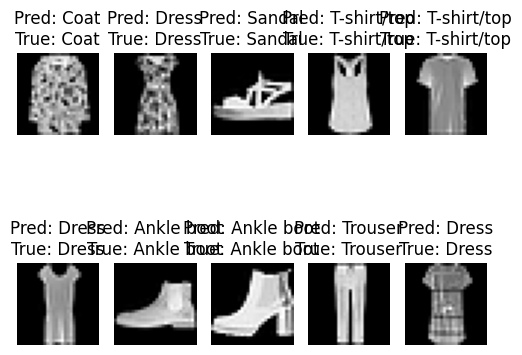

In [ ]:
num_samples = 10
indices = np.random.choice(len(test_images), num_samples, replace=False)

plt.figure(figsize=(5, 5))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_classes[index]]}\nTrue: {class_names[test_labels[index]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Висновок: використання Keras Tuner дозволило покращити точність і зменшити функцію втрат. Це свідчить про те, що автоматичний підбір гіперпараметрів може покращити продуктивність моделі, навіть якщо початково обрана архітектура вже досить добре працювала.